In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

In [32]:
df=pd.read_csv('rms_pulsed_sorted.txt',sep='\t')

In [33]:
df=df.sort_values('ObsID')
df['Date']=df['Date']+40000

In [34]:
df

,ObsID,RMS_PF,PF,Date
0,6050390202,0.132967,0.226990,60045
1,6050390203,0.137782,0.242843,60046
2,6050390204,0.151656,0.298704,60047
3,6050390206,0.195965,0.418598,60049
4,6050390212,0.210905,0.505343,60055
...,...,...,...,...
61,6050390280,0.119886,0.219574,60197
62,6050390281,0.120499,0.215582,60199
63,6050390282,0.126328,0.258936,60201
64,6050390283,0.129105,0.242573,60202


In [35]:
hdul=fits.open('/home/supremekai/thesis/J0243_6p6124/swift_monitor/swbj0243_7p6126_d2407.lc.gz')
time=hdul[1].data['TIME']
rate=hdul[1].data['RATE']

In [36]:
dfswift = pd.DataFrame(hdul[1].data)

In [37]:
dfswift

,TIME,RATE,ERROR,YEAR,DAY,STAT_ERR,SYS_ERR,DATA_FLAG,TIMEDEL_EXPO,TIMEDEL_CODED,TIMEDEL_DITHERED
0,58029,0.025708,0.001431,2017,276,0.000952,0.000900,0,7320.0,6556.625000,0.0
1,58030,0.037528,0.001816,2017,277,0.001074,0.001313,0,8024.0,4192.281250,0.0
2,58031,0.056903,0.002520,2017,278,0.001321,0.001992,0,3440.0,2452.265630,0.0
3,58032,0.068873,0.002689,2017,279,0.001019,0.002411,0,5000.0,4365.437500,0.0
4,58033,0.104165,0.003837,2017,280,0.001025,0.003646,0,7392.0,5264.687500,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
2218,60518,-0.001183,0.001846,2024,209,0.001580,-0.000041,0,6880.0,4568.709864,6880.0
2219,60519,-0.002245,0.003772,2024,210,0.003229,-0.000079,0,2480.0,1689.206261,2480.0
2220,60520,0.008503,0.011476,2024,211,0.009822,0.000298,0,2136.0,456.898153,2136.0
2221,60521,0.003230,0.002733,2024,212,0.002338,0.000113,0,2464.0,1386.640570,2464.0


In [38]:
df_merged = pd.merge(df, dfswift[['TIME', 'RATE']], left_on='Date', right_on='TIME', how='left')
df_merged

,ObsID,RMS_PF,PF,Date,TIME,RATE
0,6050390202,0.132967,0.226990,60045,60045.0,0.009000
1,6050390203,0.137782,0.242843,60046,NaN,NaN
2,6050390204,0.151656,0.298704,60047,60047.0,0.009220
3,6050390206,0.195965,0.418598,60049,60049.0,0.005205
4,6050390212,0.210905,0.505343,60055,60055.0,0.024821
...,...,...,...,...,...,...
61,6050390280,0.119886,0.219574,60197,60197.0,0.011941
62,6050390281,0.120499,0.215582,60199,60199.0,0.013465
63,6050390282,0.126328,0.258936,60201,60201.0,0.006635
64,6050390283,0.129105,0.242573,60202,60202.0,-0.000781


In [50]:
df_merged['ObsID'][12:63]

12    6050390226
13    6050390227
14    6050390228
15    6050390229
16    6050390230
17    6050390231
18    6050390232
19    6050390233
20    6050390234
21    6050390235
22    6050390236
23    6050390237
24    6050390238
25    6050390239
26    6050390240
27    6050390241
28    6050390242
29    6050390243
30    6050390244
31    6050390246
32    6050390247
33    6050390248
34    6050390249
35    6050390250
36    6050390251
37    6050390252
38    6050390253
39    6050390254
40    6050390255
41    6050390256
42    6050390257
43    6050390258
44    6050390259
45    6050390261
46    6050390262
47    6050390263
48    6050390264
49    6050390265
50    6050390266
51    6050390267
52    6050390268
53    6050390269
54    6050390270
55    6050390272
56    6050390273
57    6050390276
58    6050390277
59    6050390278
60    6050390279
61    6050390280
62    6050390281
Name: ObsID, dtype: int64

In [51]:
df_merged['RATE'][13:63]

13    0.194044
14    0.154486
15    0.164783
16    0.193897
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22    0.229234
23    0.210555
24    0.219183
25    0.242669
26    0.234456
27    0.233998
28    0.257840
29    0.248228
30    0.259345
31    0.243573
32    0.222040
33    0.241305
34    0.236257
35    0.230447
36    0.226502
37    0.214114
38    0.216214
39    0.214398
40    0.123266
41    0.140190
42    0.129373
43    0.123529
44    0.105469
45    0.090317
46    0.090840
47    0.086785
48    0.081637
49    0.068970
50    0.057120
51    0.046872
52    0.046701
53    0.041466
54    0.044519
55    0.034174
56    0.033777
57    0.023806
58    0.016545
59    0.012270
60    0.009437
61    0.011941
62    0.013465
Name: RATE, dtype: float64

In [39]:
rms_pfarr=df_merged['RMS_PF']
date_arr=df_merged['Date']
rate_arr=df_merged['RATE']*8.2*10**38 #multiplicative factor taken from doroshenko for 6.8 kpc
rms_pfarr_ob=rms_pfarr[(date_arr>60100)& (date_arr<60200)]
rate_arr_ob=rate_arr[(date_arr>60100) & (date_arr<60200)]

rms_pfarr_nb=rms_pfarr[(date_arr<60100)| (date_arr>60200)]
rate_arr_nb=rate_arr[(date_arr<60100)| (date_arr>60200)]

rms_pfarr_before=rms_pfarr[(date_arr<60100)]
rate_arr_before=rate_arr[(date_arr<60100)]
rms_pfarr_after=rms_pfarr[(date_arr>60200)]
rate_arr_after=rate_arr[(date_arr>60200)]

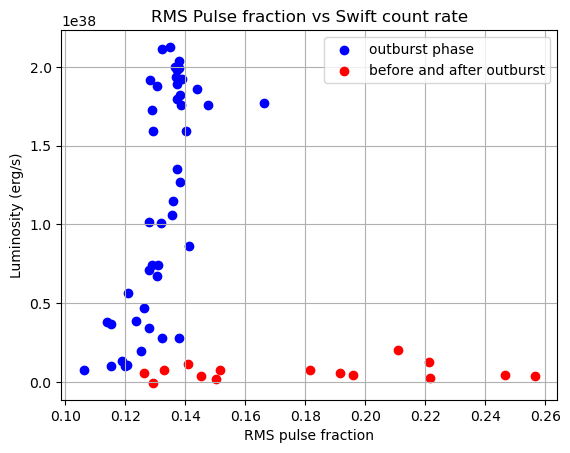

In [40]:
plt.scatter(rms_pfarr_ob,rate_arr_ob,label='outburst phase',c='b')
plt.scatter(rms_pfarr_nb,rate_arr_nb, label='before and after outburst',c='r')
# plt.scatter(rms_pfarr_before,rate_arr_before, label='before outburst',c='r')
# plt.scatter(rms_pfarr_after,rate_arr_after, label='after outburst',c='g')

plt.title('RMS Pulse fraction vs Swift count rate')
plt.ylabel(r'Luminosity (erg/s)')
plt.xlabel('RMS pulse fraction')
plt.legend()
plt.grid()

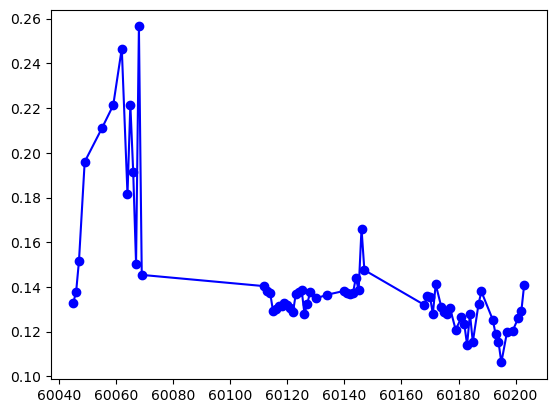

In [41]:
plt.plot(date_arr,rms_pfarr,'-o',c='b')
#plt.xlim(60100,60200)

In [42]:
2.75%1

0.75